In [1]:
import os
import sys
from pathlib import Path

import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

import re
from typing import *
from helper import to_sequences, to_padding

import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

### 1.Reading the data

In [7]:
# Define the lyrics of the song
data_path = Path('data/got/game_of_thrones.txt')
# Preview the result
df = pd.read_csv(data_path, sep='\t', names=['got_text'])

In [10]:
df['got_text'] = df['got_text'].apply(lambda x: x.lower())
df.head()

,got_text
0,a song of ice and fire
1,a game of thrones
2,prologue
3,"we should start back, gared urged as the woods..."
4,do the dead frighten you? ser waymar royce ask...


### 2.Cleaning the Data

* All words are converted to Lower case

In [19]:
corpus = df['got_text'].to_list()[:300]

In [20]:
MAX_LENGTH = 0
lens = []

for each_sentence in corpus:

    temp_len = len(each_sentence)
    lens.append(temp_len)

    if MAX_LENGTH<temp_len:
        MAX_LENGTH = temp_len


print(MAX_LENGTH, np.mean(lens))

1069 219.53


In [21]:
max([len(x) for x in corpus])

1069

### 4.Preprocessing --> Tokenization, Sequences and Padding

In [22]:
import warnings
warnings.filterwarnings('ignore')

In [23]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [24]:
# Vocabulary size of the tokenizer
VOCAB_SIZE = 10000

# Output dimensions of the Embedding layer
EMBEDDING_DIM = 64

# Parameters for padding and OOV tokens
TRUNC_TYPE = 'pre'
PADDING_TYPE = 'pre'
OOV_TOKEN = "<OOV>"

In [25]:
def get_tokenizer(VOCAB_SIZE, OOV_TOKEN, X_data=corpus):
    # Initialize the Tokenizer class
    tokenizer = Tokenizer(num_words=VOCAB_SIZE, oov_token=OOV_TOKEN)

    # Generate the word index dictionary
    tokenizer.fit_on_texts(X_data)
    
    return tokenizer

def to_sequences_n_padding(tokenizer,MAX_LENGTH,PADDING_TYPE,TRUNC_TYPE,X_data):
    # Generate and pad the training sequences
    _sequences = tokenizer.texts_to_sequences(X_data)
    _padded = pad_sequences(_sequences, 
                            maxlen=MAX_LENGTH, 
                            padding=PADDING_TYPE, 
                            truncating=TRUNC_TYPE)
    
    return _padded   


def seq_gen(sent_seq):
    input_seq = []
    for line in sent_seq:
        for i in range(1, len(line)):
            input_seq.append(line[:i+1])

    return input_seq

In [26]:
tokenizer = get_tokenizer(VOCAB_SIZE=VOCAB_SIZE,OOV_TOKEN=OOV_TOKEN)

# Define the total words. You add 1 for the index `0` which is just the padding token.
total_words = len(tokenizer.word_index) + 1

print(f'word index dictionary: {tokenizer.word_index}')
print(f'total words: {total_words}')

word index dictionary: {'<OOV>': 1, 'the': 2, 'and': 3, 'a': 4, 'of': 5, 'his': 6, 'he': 7, 'to': 8, 'was': 9, 'it': 10, 'in': 11, 'had': 12, 'her': 13, 'with': 14, 'you': 15, 'will': 16, 'as': 17, 'that': 18, 'said': 19, 'not': 20, 'for': 21, 'they': 22, 'on': 23, 'she': 24, 'him': 25, 'them': 26, 'no': 27, 'i': 28, 'is': 29, 'but': 30, 'at': 31, 'from': 32, 'their': 33, 'were': 34, 'bran': 35, 'been': 36, 'man': 37, 'all': 38, 'did': 39, 'when': 40, 'father': 41, 'this': 42, 'there': 43, 'eyes': 44, 'have': 45, 'like': 46, 'brother': 47, 'up': 48, 'jon': 49, 'could': 50, 'what': 51, 'would': 52, 'be': 53, 'out': 54, 'lord': 55, 'gared': 56, 'men': 57, 'so': 58, 'one': 59, 'back': 60, 'old': 61, 'ser': 62, 'black': 63, 'its': 64, 'hand': 65, 'sword': 66, 'then': 67, 'cold': 68, 'robb': 69, 'we': 70, 'dead': 71, 'if': 72, 'never': 73, 'see': 74, 'are': 75, 'than': 76, 'my': 77, 'long': 78, 'your': 79, 'well': 80, 'dany': 81, 'waymar': 82, 'royce': 83, 'an': 84, 'snow': 85, 'illyrio': 8

In [27]:
sent_seq = to_sequences(tokenizer=tokenizer,X_data=corpus)

In [28]:
sent_seq[:3]

[[4, 708, 5, 135, 3, 153], [4, 1114, 5, 1115], [1116]]

In [29]:
# Get the length of the longest line
MAX_LENGTH = max([len(x) for x in sent_seq])
print(MAX_LENGTH)

198


In [30]:
len(sent_seq)

300

In [31]:
input_seq = seq_gen(sent_seq)

In [32]:
input_seq[:10]

[[4, 708],
 [4, 708, 5],
 [4, 708, 5, 135],
 [4, 708, 5, 135, 3],
 [4, 708, 5, 135, 3, 153],
 [4, 1114],
 [4, 1114, 5],
 [4, 1114, 5, 1115],
 [70, 295],
 [70, 295, 709]]

In [33]:
padded_seq = to_padding(input_seq, 
                        MAX_LENGTH=MAX_LENGTH,
                        PADDING_TYPE=PADDING_TYPE,
                        TRUNC_TYPE=TRUNC_TYPE
                        )

In [34]:
padded_seq.shape

(11928, 198)

In [35]:
padded_seq[:10]

array([[   0,    0,    0, ...,    0,    4,  708],
       [   0,    0,    0, ...,    4,  708,    5],
       [   0,    0,    0, ...,  708,    5,  135],
       ...,
       [   0,    0,    0, ..., 1114,    5, 1115],
       [   0,    0,    0, ...,    0,   70,  295],
       [   0,    0,    0, ...,   70,  295,  709]])

### 5. Dataset Preparation

In [36]:
# Create inputs and label by splitting the last token in the subphrases
xs, labels = padded_seq[:, :-1], padded_seq[:, -1]

In [37]:
# Convert the label into one-hot arrays
ys = tf.keras.utils.to_categorical(labels, num_classes=total_words)

### 6. LSTM +BIDIRECTIONAL

##### Callbacks

In [38]:
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='loss',
    min_delta=0.0001,
    patience=20,
    verbose=0,
    mode='auto',
    # baseline=None,
    restore_best_weights=True,
    # start_from_epoch=0
)

# Saving the best model and its weights to given path
checkpoint_filepath = 'models/model_checkpoint_LSTM.h5'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    verbose=1,
    # save_weights_only=True,
    save_best_only=True,
    monitor='loss',
    mode='auto'
)

##### Model Training

In [39]:
import warnings
warnings.filterwarnings('ignore')

In [40]:
# Build the model
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(
        total_words, EMBEDDING_DIM, input_length=MAX_LENGTH-1, name="embedding"),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(50, name="lstm1_50", return_sequences=False)),

    # tf.keras.layers.Flatten(),

    # tf.keras.layers.Dense(1200, activation='relu', name="dense32"),
    # tf.keras.layers.BatchNormalization(name="batch1"),
    # tf.keras.layers.Dropout(0.5, name="dropout1"),

    # tf.keras.layers.Dense(800, activation='relu', name="dense16"),
    # tf.keras.layers.BatchNormalization(name="batch2"),
    # tf.keras.layers.Dropout(0.4, name="dropout2"),


    tf.keras.layers.Dense(total_words, activation='softmax', name="last_dense1")
])

# Print the model summary
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 197, 64)           150144    
                                                                 
 bidirectional (Bidirection  (None, 100)               46000     
 al)                                                             
                                                                 
 last_dense1 (Dense)         (None, 2346)              236946    
                                                                 
Total params: 433090 (1.65 MB)
Trainable params: 433090 (1.65 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [41]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [43]:
import warnings
warnings.filterwarnings('ignore')
history = model.fit(xs,ys,
          epochs=3,
          verbose=2,
          callbacks=[early_stopping,
                     model_checkpoint_callback])

Epoch 1/3

Epoch 1: loss improved from 6.17686 to 5.98723, saving model to models\model_checkpoint_LSTM.h5
373/373 - 39s - loss: 5.9872 - accuracy: 0.0798 - 39s/epoch - 106ms/step
Epoch 2/3

Epoch 2: loss improved from 5.98723 to 5.86619, saving model to models\model_checkpoint_LSTM.h5
373/373 - 42s - loss: 5.8662 - accuracy: 0.0826 - 42s/epoch - 112ms/step
Epoch 3/3

Epoch 3: loss improved from 5.86619 to 5.75563, saving model to models\model_checkpoint_LSTM.h5
373/373 - 39s - loss: 5.7556 - accuracy: 0.0879 - 39s/epoch - 106ms/step


In [33]:
history.history.keys()

dict_keys(['loss', 'accuracy'])

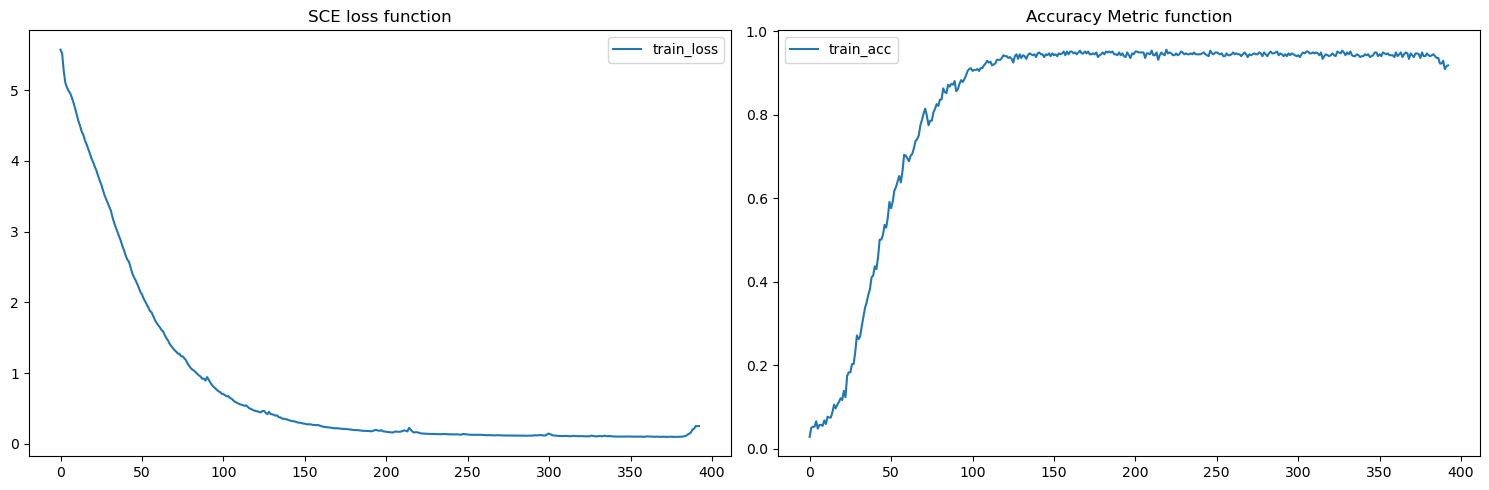

In [34]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

ax[0].plot(history.history['loss'], label="train_loss")
ax[0].set_title("SCE loss function")
ax[0].legend()

ax[1].plot(history.history['accuracy'], label="train_acc")
ax[1].set_title("Accuracy Metric function")
ax[1].legend()
plt.tight_layout()
plt.show()

### Text Generation

In [45]:
# Define seed text
seed_text = "Laurence went to Dublin"

# Define total words to predict
next_words = 100

# Loop until desired length is reached
for _ in range(next_words):


  token_list = tokenizer.texts_to_sequences([seed_text])[0]
  token_list = pad_sequences([token_list], maxlen=MAX_LENGTH-1, padding='pre')

# Feed to the model and get the probabilities for each index
  probabilities = model.predict(token_list)

  # Pick a random number from [1,2,3]
  choice = np.random.choice([1, 2, 3])

  # Sort the probabilities in ascending order
  # and get the random choice from the end of the array
  predicted = np.argsort(probabilities)[0][-choice]

# Ignore if index is 0 because that is just the padding.
  if predicted != 0:

	# Look up the word associated with the index.
	  output_word = tokenizer.index_word[predicted]

	# Combine with the seed text
	  seed_text += " " + output_word

# Print the result
print(seed_text)

1/1 [==============================] - 0s 16ms/step
Laurence went to Dublin to the row polkas taras mchugh kerrigan they they by hearty entangled all hearty entangled entangled me hearty hearty all me them the kerrigan lanigans as ribbons bees all a old old rose glisten glisten jig jig jig all ground a jig jig ladies table fainted by a jig cask taras call jig call wall jig fainted were hearty entangled entangled me hearty entangled entangled entangled entangled all entangled entangled all a rose kerrigan all me a rose call jig jig fainted by a ask cask jig fainted were ground a hall table table fainted they were of ground ground
